<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/SelectFeatures1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prapare Data

In [2]:
from pandas import read_csv
from sklearn.model_selection import train_test_split

def load_dataset(filename):
  # load the dataset 
  data = read_csv(filename, header= None)
  # retrieve array
  dataset = data.values
  # split into input and output variables
  X = dataset[:,:-1]
  y = dataset[:,-1]
  return X, y

# load dataset
X, y = load_dataset('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (514, 8) (514,)
Test (254, 8) (254,)


# Feature Selection

In [5]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

Feature 0: 16.527385
Feature 1: 131.325562
Feature 2: 0.042371
Feature 3: 1.415216
Feature 4: 12.778966
Feature 5: 49.209523
Feature 6: 13.377142
Feature 7: 25.126440


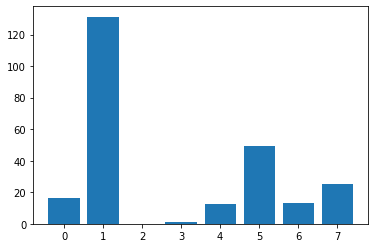

In [6]:
# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f' %(i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Mutual Information Feature Selection

Feature 0: 0.016548
Feature 1: 0.093594
Feature 2: 0.013925
Feature 3: 0.005257
Feature 4: 0.041272
Feature 5: 0.080642
Feature 6: 0.004858
Feature 7: 0.056754


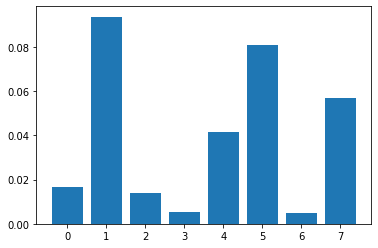

In [14]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import  pyplot

def load_dataset(filename):
  #load dataset
  data = read_csv(filename, header= None)
  # Split data
  dataset = data.values
  X = dataset[:,:-1]
  y = dataset[:,-1]
  return X, y

def select_features(X_train, y_train, X_test):
  # select feature model
  fs = SelectKBest(score_func=mutual_info_classif, k='all')
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

# load the dataset
X, y = load_dataset('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv')
# split data into input and output sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=1)
# select feature
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
for i in range(len(fs.scores_)):
  # plot the scores
  print('Feature %d: %f'%(i, fs.scores_[i]))
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [23]:
data = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', header=None)
print(data.describe())
print(data.head())

                0           1           2  ...           6           7           8
count  768.000000  768.000000  768.000000  ...  768.000000  768.000000  768.000000
mean     3.845052  120.894531   69.105469  ...    0.471876   33.240885    0.348958
std      3.369578   31.972618   19.355807  ...    0.331329   11.760232    0.476951
min      0.000000    0.000000    0.000000  ...    0.078000   21.000000    0.000000
25%      1.000000   99.000000   62.000000  ...    0.243750   24.000000    0.000000
50%      3.000000  117.000000   72.000000  ...    0.372500   29.000000    0.000000
75%      6.000000  140.250000   80.000000  ...    0.626250   41.000000    1.000000
max     17.000000  199.000000  122.000000  ...    2.420000   81.000000    1.000000

[8 rows x 9 columns]
   0    1   2   3    4     5      6   7  8
0  6  148  72  35    0  33.6  0.627  50  1
1  1   85  66  29    0  26.6  0.351  31  0
2  8  183  64   0    0  23.3  0.672  32  1
3  1   89  66  23   94  28.1  0.167  21  0
4  0  137  40  3

Model Built Using All Features

In [31]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# load the dataset
def load_dataset(filename):
  # load the dataset as a pandas DataFrame
  data = read_csv(filename, header=None)
  # retrieve numpy array
  dataset = data.values
  # split into input(X) and ouput(y) variables
  X = dataset[:,:-1]
  y = dataset[:,-1]
  return X, y

# load the dataset
X, y = load_dataset('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv')
# split data into input and output sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
#yhat1 = model.predict(X_train)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
#accuracy = accuracy_score(y_train, yhat1)
print('Accuracy: %.2f'% (accuracy*100))

Accuracy: 77.56


# Model Built Using ANOVA F-test Features

In [49]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif

# load the dataset
def load_dataset(filename):
  # load the dataset as a pandas DataFrame
  data = read_csv(filename, header=None)
  # split into input and output variable
  dataset = data.values
  X = dataset[:,:-1]
  y = dataset[:,-1]
  return X, y

# feature selection
def select_features(X_train, y_train, X_test):
  # configure to select a subset of features
  fs = SelectKBest(score_func=mutual_info_classif,k=1)
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train, X_test, fs

# load the dataset
X, y = load_dataset('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy1 = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' %(accuracy1*100))

Accuracy: 77.56


# Tune the Number of Selected Features

In [ ]:
from pandas import read_csv
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# load the dataset
def load_dataset(filename):
  data = read_csv(filename, header=None)
  dataset = data.values
  X = dataset[:,:-1]
  y = dataset[:,-1]
  return X, y

# define dataset
X, y = load_dataset('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv')
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LogisticRegression(solver='liblinear')
fs = SelectKBest(score_func=f_classif)
pipeline = Pupeline(steps=[('anova', fs), ('lr', model)])
# define the grid
grid = dict()
grid['anova__k'] = [i+1 for i in range(X.shape[1])]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X,y)
# summarize best
print('Best Mean Accuracy: %.3f' %results.best_score_)
print('Best Config: %s' % results.best_params_)
